In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv('stl10.csv')
df.head()

,Mean,Median,Variance,Standard Deviation,Skewness,Prewitt X,Prewitt Y,Sobel X,Sobel Y,Canny Edge,label
0,130.111003,142,3198.838481,56.558275,-0.630624,19.712023,4.688694,4902.0,-17.333333,19.921875,1
1,96.828125,108,793.087646,28.161812,-1.190109,15.912218,4.041233,4190.0,-88.553602,19.949544,1
2,95.120877,108,1930.212168,43.934180,-0.879438,9.323893,10.490777,5023.0,26.101128,13.613281,1
3,147.227322,167,3967.940404,62.991590,-0.941682,21.234266,5.453993,3523.0,-121.785482,32.622070,1
4,103.988715,92,4033.389630,63.508973,0.566316,24.020508,7.852539,4243.0,-113.223633,35.278320,1


In [7]:
df['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [11]:
df.columns

Index(['Mean', 'Median', 'Variance', 'Standard Deviation', 'Skewness',
       'Prewitt X', 'Prewitt Y', 'Sobel X', 'Sobel Y', 'Canny Edge', 'label'],
      dtype='object')

In [14]:
X = df[['Mean', 'Median','Variance', 'Standard Deviation', 'Skewness', 'Prewitt X', 'Prewitt Y', 'Sobel X','Sobel Y', 'Canny Edge']] .values
X[0:5]

array([[ 1.30111003e+02,  1.42000000e+02,  3.19883848e+03,
         5.65582751e+01, -6.30623762e-01,  1.97120226e+01,
         4.68869358e+00,  4.90200000e+03, -1.73333333e+01,
         1.99218750e+01],
       [ 9.68281250e+01,  1.08000000e+02,  7.93087646e+02,
         2.81618118e+01, -1.19010897e+00,  1.59122179e+01,
         4.04123264e+00,  4.19000000e+03, -8.85536024e+01,
         1.99495443e+01],
       [ 9.51208767e+01,  1.08000000e+02,  1.93021217e+03,
         4.39341800e+01, -8.79437600e-01,  9.32389323e+00,
         1.04907769e+01,  5.02300000e+03,  2.61011285e+01,
         1.36132812e+01],
       [ 1.47227322e+02,  1.67000000e+02,  3.96794040e+03,
         6.29915899e+01, -9.41681801e-01,  2.12342665e+01,
         5.45399306e+00,  3.52300000e+03, -1.21785482e+02,
         3.26220703e+01],
       [ 1.03988715e+02,  9.20000000e+01,  4.03338963e+03,
         6.35089728e+01,  5.66315974e-01,  2.40205078e+01,
         7.85253906e+00,  4.24300000e+03, -1.13223633e+02,
         3.

In [15]:
y = df['label'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.50119261,  0.62322985, -0.213255  , -0.07504343, -0.69339075,
        -0.38207266, -1.34388583, -0.60038682,  0.06979851, -1.09751798],
       [-0.45356016, -0.10229966, -1.48637922, -1.82386285, -1.37188734,
        -0.8632625 , -1.47238168, -1.10391693, -0.55654733, -1.09552773],
       [-0.5025343 , -0.10229966, -0.88461251, -0.85250866, -0.99513124,
        -1.69757773, -0.19239761, -0.51481499,  0.45178239, -1.55129688],
       [ 0.99219143,  1.15670742,  0.19375402,  0.32115752, -1.07061576,
        -0.18930267, -1.1920036 , -1.57562281, -0.84880472, -0.18398943],
       [-0.24815144, -0.44372531,  0.22838978,  0.35302097,  0.75815704,
         0.16353415, -0.71598537, -1.06643506, -0.77350763,  0.00707537]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.905
Test set Accuracy:  0.885


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.84 , 0.86 , 0.865, 0.885, 0.885, 0.88 , 0.87 , 0.88 , 0.88 ])

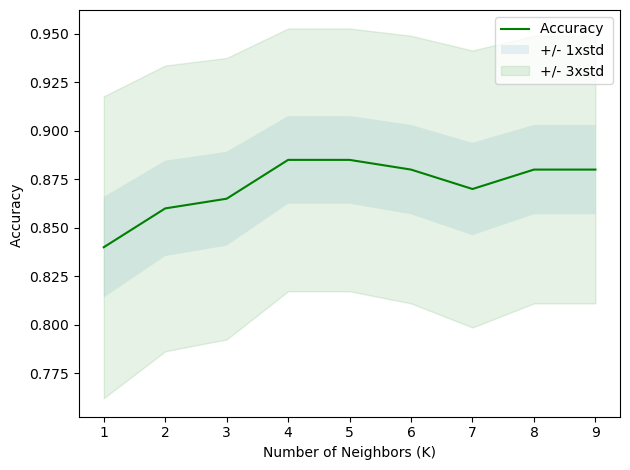

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.885 with k= 4
